# Normalización de Datos

## Antecedentes y Contexto

Se obtuvieron datos de la web que nos indican puntuaciones de películas según el IMDb (Internet Movie Database) y la cantidad de  likes que tienen en Facebook dichas películas.

Revisemos los datos...

In [45]:
# Importación de librerías para lectura y cambio de valores NaN por 0

import pandas as pd
import numpy as np

In [46]:
# Importamos la base de datos, reemplazamos los valores nulos por 0, y convertimos en data frame

datos = pd.read_csv('movies.csv')
datos = datos.replace(np.nan,"0")
df = pd.DataFrame(datos)
df.head(10)

,imdb_score,movie_facebook_likes,Unnamed: 2
0,7.9,33000,0
1,7.1,0,0
2,6.8,85000,0
3,8.5,164000,0
4,7.1,0,0
5,6.6,24000,0
6,6.2,0,0
7,7.8,29000,0
8,7.5,118000,0
9,7.5,10000,0


In [47]:
# Eliminando la información no relevante

df.drop(columns = ['Unnamed: 2'], inplace = True)
df.head(10)

,imdb_score,movie_facebook_likes
0,7.9,33000
1,7.1,0
2,6.8,85000
3,8.5,164000
4,7.1,0
5,6.6,24000
6,6.2,0
7,7.8,29000
8,7.5,118000
9,7.5,10000


Podemos ver que existe gran dispersión numérica de los datos. Veamos sus estadísticas descriptivas

In [48]:
df.describe()

,imdb_score,movie_facebook_likes
count,5043.000000,5043.000000
mean,6.460500,7525.883601
std,1.711121,19320.475709
min,1.600000,0.000000
25%,5.800000,0.000000
50%,6.600000,165.000000
75%,7.200000,3000.000000
max,98.000000,349000.000000


Podemos apreciar que existe gran variabilidad entre números máximos y mínimos de ambas variables, y además son numericamente muy distantes entre sí. Veamos la distribución estadística de ambas variables para ver si podemos observar el comportamiento de los datos

<AxesSubplot:title={'center':'Distribución Estadística'}, xlabel='movie_facebook_likes', ylabel='Density'>

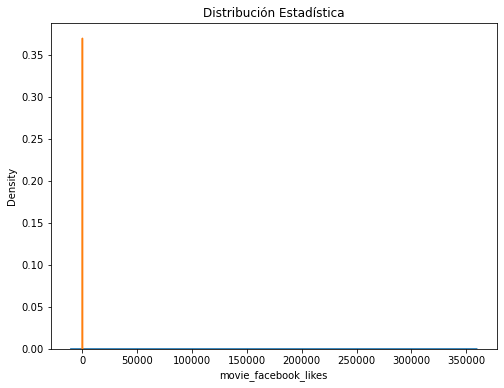

In [49]:
#Graficando distribuciones de ambas variables

fig,(ax1)=plt.subplots(figsize=(8,6))
ax1.set_title('Distribución Estadística')
sns.kdeplot(df['movie_facebook_likes'],ax=ax1)
sns.kdeplot(df['imdb_score'],ax=ax1)

Podemos ver que dada la diferencia en el tamaño de los datos no nos permite ver el comportamiento de ambas variables al mismo tiempo. Por lo que necesitamos Normalizar los datos.

La normalización estadística es ajustar los datos de una o más variables a una escala común, con el fin de hacer comparaciones más exactas. Esto nos sirve para estudiar comportamientos entre diferentes variables y evitar las influencias de números muy alejados de la media.

In [50]:
# Importando librerías para graficar y pre-procesamiento de datos

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

<AxesSubplot:title={'center':'Después de Normalizar'}, xlabel='movie_facebook_likes', ylabel='Density'>

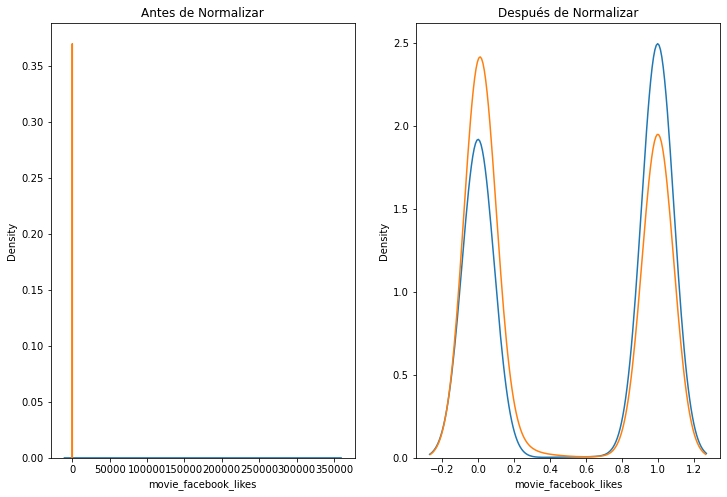

In [51]:
# Aca se hace una comparativa entre el grafico anterior y un grafico despues de normalizar los datos

fig,(ax1, ax2)=plt.subplots(ncols=2, figsize=(12,8))
ax1.set_title('Antes de Normalizar')
sns.kdeplot(df['movie_facebook_likes'],ax=ax1)
sns.kdeplot(df['imdb_score'],ax=ax1)

scaler=preprocessing.Normalizer(norm='l2', copy=True)
df[['imdb_score','movie_facebook_likes']]=scaler.fit_transform(df[['imdb_score','movie_facebook_likes']])

ax2.set_title('Después de Normalizar')
sns.kdeplot(df['movie_facebook_likes'],ax=ax2)
sns.kdeplot(df['imdb_score'],ax=ax2)

Gracias a la normalización de las variables, podemos darnos cuenta que el comportamiento de nuestras variables es similar. Y tiene mucho sentido. Justamente aquellas películas que tienen alta puntuación según el IMDb, también tienen una alta cantidad de likes en Facebook. Y al revés también, aquellas películas que tienen una alta cantidad de likes en Facebook, tienden a tener altas puntuaciones según el IMDb.

**Este informe tiene por objetivo ser un aporte público para aquellos que desean involucrarse en este ámbito.**

**Cualquier comentario y/o sugerencia escribir a mi correo: allangajardom@gmail.com**